### The main questions that you need to investigate are:

- Does cholera cause dehydration?


- Is the gastric acid index correlated to feces consistency and vomit color?

# Intro

In [98]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
import math as m

sns.set()

In [58]:
redye = ['#C61437', '#3F33FF']

In [30]:
data = pd.read_csv('data/cholera-dataset.csv').drop('Unnamed: 0', axis=1)

In [31]:
data.head()

,age,sex,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ia            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 30.9+ KB


In [33]:
columns_name = ['age', 'sex', 'dehydration', 'blood_pressure', 'colestherol', 'seizures', 'vomit_color', \
               'gastric_acid', 'blood_type_o','poo_consistency','exposure_type', 'fever','cholera' ]

In [34]:
data.columns = columns_name
data.head()

,age,sex,dehydration,blood_pressure,colestherol,seizures,vomit_color,gastric_acid,blood_type_o,poo_consistency,exposure_type,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [63]:
data['sex_type'] = np.where(data.sex == 'Male', 1,0)

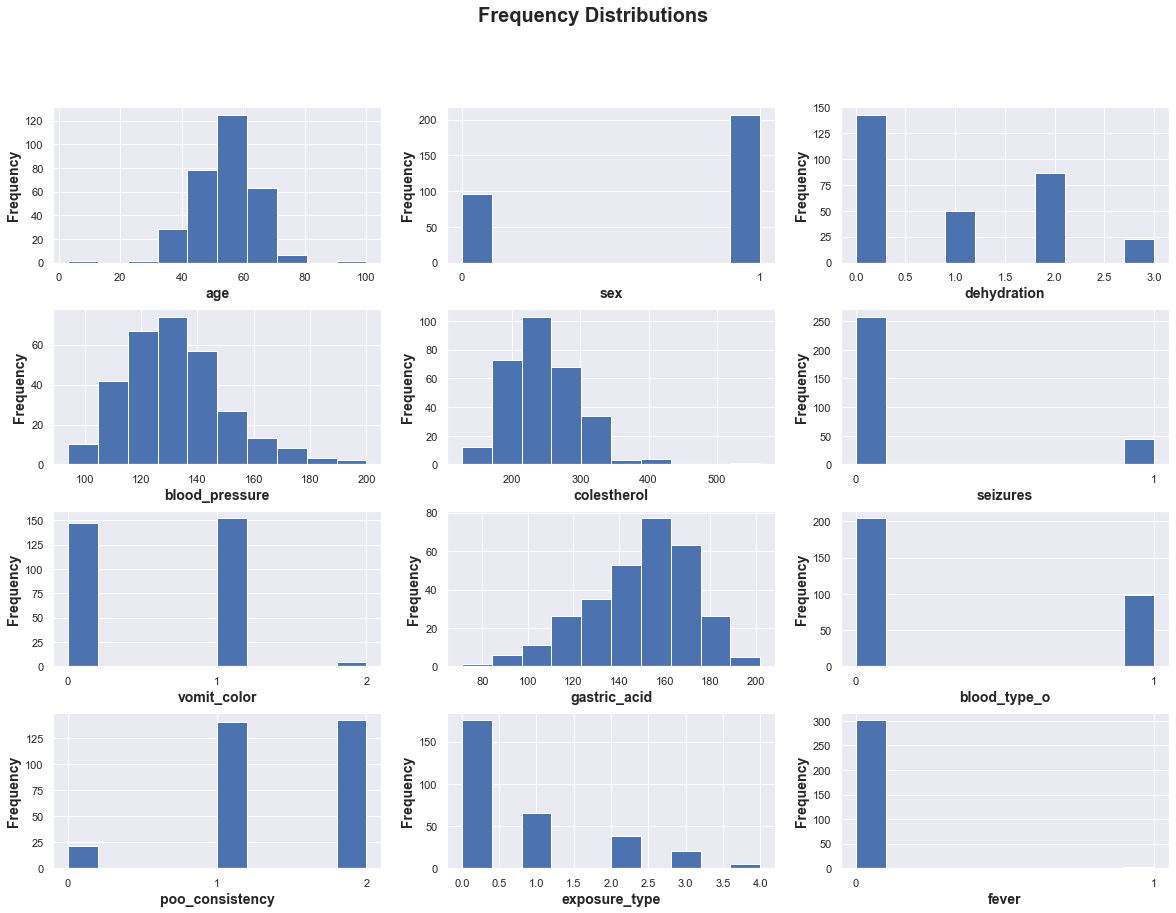

In [72]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,3, figsize=[20,14])
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Frequency Distributions', fontweight = 900, fontsize = 20)

ax1[0].hist(data.age)
ax1[0].set_xlabel('age',fontweight = 900, fontsize = 14)
ax1[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax1[1].hist(data.sex_type)
ax1[1].set_xlabel('sex',fontweight = 900, fontsize = 14)
ax1[1].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1[1].set_xticks(np.arange(0, 2,1))

ax1[2].hist(data.dehydration)
ax1[2].set_xlabel('dehydration',fontweight = 900, fontsize = 14)
ax1[2].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax2[0].hist(data.blood_pressure)
ax2[0].set_xlabel('blood_pressure',fontweight = 900, fontsize = 14)
ax2[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax2[1].hist(data.colestherol)
ax2[1].set_xlabel('colestherol',fontweight = 900, fontsize = 14)
ax2[1].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax2[2].hist(data.seizures)
ax2[2].set_xlabel('seizures',fontweight = 900, fontsize = 14)
ax2[2].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax2[2].set_xticks(np.arange(0, 2,1))

ax3[0].hist(data.vomit_color)
ax3[0].set_xlabel('vomit_color',fontweight = 900, fontsize = 14)
ax3[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax3[0].set_xticks(np.arange(0, 3,1))

ax3[1].hist(data.gastric_acid)
ax3[1].set_xlabel('gastric_acid',fontweight = 900, fontsize = 14)
ax3[1].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax3[2].hist(data.blood_type_o)
ax3[2].set_xlabel('blood_type_o',fontweight = 900, fontsize = 14)
ax3[2].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax3[2].set_xticks(np.arange(0, 2,1))

ax4[0].hist(data.poo_consistency)
ax4[0].set_xlabel('poo_consistency',fontweight = 900, fontsize = 14)
ax4[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax4[0].set_xticks(np.arange(0, 3,1))

ax4[1].hist(data.exposure_type)
ax4[1].set_xlabel('exposure_type',fontweight = 900, fontsize = 14)
ax4[1].set_ylabel('Frequency',fontweight = 900, fontsize = 14)

ax4[2].hist(data.fever)
ax4[2].set_xlabel('fever',fontweight = 900, fontsize = 14)
ax4[2].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax4[2].set_xticks(np.arange(0, 2,1))

plt.show()



In [ ]:
'age', 'sex', 'dehydration', 'blood_pressure', 'colestherol', 'seizures', 'vomit_color', \
               'gastric_acid', 'blood_type_o','poo_consistency','exposure_type', 'fever','cholera'

In [77]:
data_numeric = data[['age','blood_pressure', 'colestherol','gastric_acid']]

In [78]:
corr = data_numeric.corr()

In [79]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

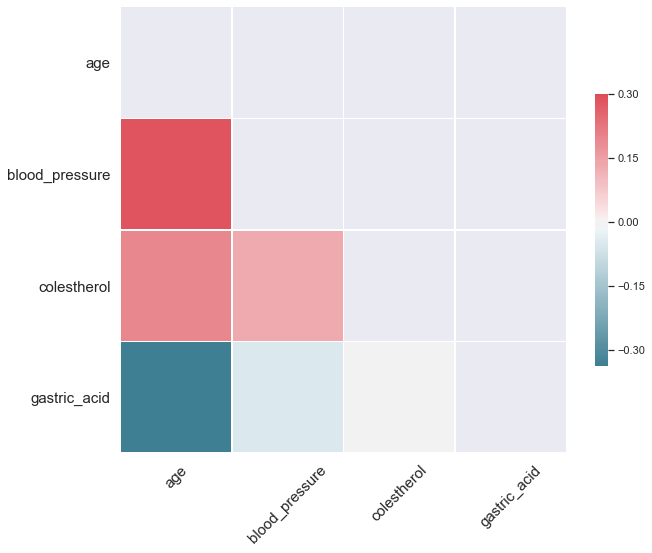

In [85]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.tick_params(axis="x", labelsize=15, rotation = 45)
ax.tick_params(axis="y", labelsize=15, rotation = 0)


In [ ]:
data_numeric = data[['age','blood_pressure', 'colestherol','gastric_acid']]

In [88]:
data_cholera = data[data['cholera'] == 1]
data_no_cholera = data[data['cholera'] == 0]

In [96]:
var_colest_cholera = data_cholera['colestherol'].var()
var_colest_no_cholera = data_no_cholera['colestherol'].var()

print(var_colest_cholera)
print(var_colest_no_cholera)

2891.2108350586614
2477.2304466230935


# Question 2

## Hypothesis testing with numerical variables

#### Blood pressure

Z = mean blood pressure with cholera - mean blood pressure without cholera
alpha = 0.05

#H0: Mz = 0
#Ha: Mz != 0 

In [108]:
stats.ttest_ind(data_no_cholera['blood_pressure'], data_cholera['blood_pressure'], equal_var = False)

Ttest_indResult(statistic=2.5412927171039, pvalue=0.011546059200233312)

#### Gastric acid

Z = mean blood gastric acid with cholera - mean blood gastric acid without cholera
alpha = 0.05

#H0: Mz = 0
#Ha: Mz != 0 

In [109]:
stats.ttest_ind(data_no_cholera['gastric_acid'], data_cholera['gastric_acid'], equal_var = False)

Ttest_indResult(statistic=-7.953039312035018, pvalue=5.018595443073019e-14)

#### Age

Z = mean blood age with cholera - mean age without cholera
alpha = 0.05

#H0: Mz = 0
#Ha: Mz != 0 

In [113]:
stats.ttest_ind(data_no_cholera['age'], data_cholera['age'], equal_var = True)

Ttest_indResult(statistic=3.5088609641246595, pvalue=0.0005187581148999044)

In [144]:
data_3 = data.dropna()

In [147]:
data_cholera_3 = data_3[data['cholera'] == 1]
data_no_cholera_3 = data_3[data['cholera'] == 0]

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Colesterol

Z = mean colesterol with cholera - mean colesterol without cholera
alpha = 0.05

#H0: Mz = 0
#Ha: Mz != 0 

In [149]:
stats.ttest_ind(data_no_cholera_3['colestherol'], data_cholera_3['colestherol'], equal_var = False)

Ttest_indResult(statistic=1.6124031820269276, pvalue=0.10795020237881542)

## Summary

1- Divide the data into two groups, one for people with cholera and without cholera.
2- We wanted to see if there are differences between the means of the numerical variables among the two groups.
3- This analysis was conducted using a independent t-test.

1st analysis:

**Blood presure:**

We have statistical evidence to reject the null hypothesis and concluded that there are differences in the blood pressure mean between people with cholera and without.

**Gastric acid:**

We have statistical evidence to reject the null hypothesis and concluded that there are differences in the gastric acid mean between people with cholera and without.

**Age:**

We have statistical evidence to reject the null hypothesis and concluded that there are differences in the age mean between people with cholera and without.

**Colestherol**

We cannot reject the null hypothesis, there are no evidence to suggest that the means between the groups are different. 



## - Is the gastric acid index correlated to feces consistency and vomit color?

In [123]:
a = pd.get_dummies(data['sex'])
b = pd.get_dummies(data['dehydration'])
c = pd.get_dummies(data['seizures'])
d = pd.get_dummies(data['vomit_color'])
e = pd.get_dummies(data['blood_type_o'])
f = pd.get_dummies(data['poo_consistency'])
g = pd.get_dummies(data['exposure_type'])
h = pd.get_dummies(data['fever'])

In [125]:
d.columns = ['normal','abnormal', 'clear']
f.columns = ['normal', 'watery', 'rice_water']

## ANOVA

H0: No difference between means, i.e. ?x1 = ?x2 = ?x3

Ha: Difference between means exist somewhere, i.e. ?x1 ? ?x2 ? ?x3, or ?x1 = ?x2 ? ?x3, or ?x1 ? ?x2 = ?x3

**ANOVA with Vomit**

In [135]:
stats.f_oneway(data['gastric_acid'][data['vomit_color'] == 0],
                data['gastric_acid'][data['vomit_color'] == 1],
                data['gastric_acid'][data['vomit_color'] == 2])

F_onewayResult(statistic=3.431943313939471, pvalue=0.03359858629884708)

In [ ]:
#Vomit color is related to acid gastric index since p value is less than 5%

In [139]:
stats.f_oneway(data['gastric_acid'][data['vomit_color'] == 0],
                data['gastric_acid'][data['vomit_color'] == 1])

F_onewayResult(statistic=2.3628984982445584, pvalue=0.12531577520945641)

**ANOVA with poo**

In [140]:
stats.f_oneway(data['gastric_acid'][data['poo_consistency'] == 0],
                data['gastric_acid'][data['poo_consistency'] == 1],
                data['gastric_acid'][data['poo_consistency'] == 2])

F_onewayResult(statistic=38.53032747103051, pvalue=1.2779256165395148e-15)

In [141]:
stats.f_oneway(
                data['gastric_acid'][data['poo_consistency'] == 1],
                data['gastric_acid'][data['poo_consistency'] == 2])

F_onewayResult(statistic=78.81090827672934, pvalue=8.370237839050176e-17)

### Summary Anova


**Vomit color**

We reject the null hypothesis and we have evidence to suggest that there are differences in the vomit color means and the gastric acid index but we cannot define where are those differences. 


**Vomit color**

We reject the null hypothesis and we have evidence to suggest that there are differences in the vomit color means and the gastric acid index but we cannot define where are those differences. 

Note on vomit:

When removing the observations with Rice Water, we could not reject the null hypothesis. 


**Poo consistencyt**

We reject the null hypothesis and we have evidence to suggest that there are differences in the poo consistency means and the gastric acid index but we cannot define where are those differences. 

Note on poo:

After removing the observations with Normal poo, the p-value was even more significant. 






## Post hoc testing

### Multiple Linear Regresssion

In [114]:
import statsmodels.api as sm

In [132]:
y = data['gastric_acid']

x = [
    data['age'],
    d['abnormal'],
    d['clear'],
    f['watery'],
    f['rice_water']
]

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [133]:
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:           gastric_acid   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     22.88
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           2.00e-19
Time:                        13:04:25   Log-Likelihood:                -1328.9
No. Observations:                 303   AIC:                             2670.
Df Residuals:                     297   BIC:                             2692.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.3657      4.638      2.881      0.0

### Tukey Honestly Significant Difference

##### With poo consistency

In [142]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data['gastric_acid'], data['poo_consistency'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -5.6119 0.4738 -16.9114  5.6876  False
     0      2  15.6516 0.0035   4.3625 26.9407   True
     1      2  21.2635  0.001  15.5126 27.0144   True
-----------------------------------------------------


##### With vomit color

In [143]:
mc = MultiComparison(data['gastric_acid'], data['vomit_color'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   4.0558 0.2728  -2.1359 10.2474  False
     0      2 -22.1548 0.1337 -49.2787  4.9691  False
     1      2 -26.2105 0.0606 -53.3226  0.9016  False
-----------------------------------------------------
